# Adventure Works Cycles Sales Data Analysis

Adventure Works Cycles, a large wholesaler of bicycles in the US and Europe, has noticed that their total profits have been declining over the last few months. They have approached me to help them analyzing what are the drivers of this change.

The company’s IT department has provided me with the company’s sales data over the last few years. In the absence of any consultation with the business, I will need to examine this data on my own and decide which key elements I will focus on in your analysis.

### Importing required libraries

In [1]:
import urllib.request
import tarfile
import gzip
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading data

In [2]:
fname = 'adventure_works_purchase_orders.tar.gz'

if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()
elif fname.endswith("tar"):
    tar = tarfile.open(fname, "r:")
    tar.extractall()
    tar.close()

In [3]:
# file_url = r'https://github.com/DoodleScheduling/hiring-challenges/blob/2e75e37d32b11e0e5ac735b4b1311d4eeee69ecb/data-analyst/adventure_works_purchase_orders.tar.gz'
# fname = 'adventure_works_purchase_orders.tar.gz'

In [4]:
# if file_url.endswith("tar.gz"):
#     tar = tarfile.open(fname, "r:gz")
#     tar.extractall()
#     tar.close()
# elif file_url.endswith("tar"):
#     tar = tarfile.open(fname, "r:")
#     tar.extractall()
#     tar.close()

In [5]:
# loading dataset and transforming OrderDate into Pandas datetime format
df = pd.read_csv('adventure_works_purchase_orders.csv', parse_dates=['OrderDate'], infer_datetime_format=True)

### Initial data exploration

In [6]:
df.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,...,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
0,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.0944,3374.99,0.0,1,51.3415
1,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.0944,3374.99,0.0,3,51.3415
2,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.0944,3374.99,0.0,1,51.3415
3,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.1544,3399.99,0.0,1,51.3415
4,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.1544,3399.99,0.0,1,51.3415


In [7]:
df.tail(3)

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,...,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
41881,SO71952,2008-06-01,00:00.0,00:00.0,Michael Blythe,United States,Michigan,Detroit,48226,AW00030046,...,113561,Components,Mountain Frames,"HL Mountain Frame - Silver, 46",FR-M94S-46,934.000250,1364.50,0.0,4,50.0991
41882,SO71952,2008-06-01,00:00.0,00:00.0,Michael Blythe,United States,Michigan,Detroit,48226,AW00030046,...,113562,Components,Bottom Brackets,LL Bottom Bracket,BB-7421,29.964500,53.99,0.0,3,50.0991
41883,SO71952,2008-06-01,00:00.0,00:00.0,Michael Blythe,United States,Michigan,Detroit,48226,AW00030046,...,113563,Bikes,Mountain Bikes,"Mountain-500 Silver, 42",BK-M18S-42,385.272375,564.99,0.4,3,50.0991


In [8]:
df.shape

(41884, 25)

We've got 41884 entries in our dataset and 25 variables.

In [9]:
print(df['OrderDate'].min())
print(df['OrderDate'].max())

2005-07-01 00:00:00
2008-06-01 00:00:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41884 entries, 0 to 41883
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   SalesOrderNumber      41884 non-null  object        
 1   OrderDate             41884 non-null  datetime64[ns]
 2   DueDate               41884 non-null  object        
 3   ShipDate              41884 non-null  object        
 4   Sales_Person          41884 non-null  object        
 5   Sales_Region          41884 non-null  object        
 6   Sales_Province        41884 non-null  object        
 7   Sales_City            41884 non-null  object        
 8   Sales_Postal_Code     41884 non-null  int64         
 9   Customer_Code         41884 non-null  object        
 10  Customer_Name         41884 non-null  object        
 11  Customer_Region       41884 non-null  object        
 12  Customer_Province     41884 non-null  object        
 13  Customer_City   

It looks like we have daily sales data for three years from July 2005 till June 2008.

There are no missing values in the dataset. Most of the variables are categorical. There are several variables, which we won't need for our analysis: SalesOrderNumber, LineItem_Id, Sales_Postal_Code, Customer_Postal_Code, OrderDate, DueDate. We will get rid of them later on.

Let's now check specific variables.

In [11]:
print(df['DueDate'].value_counts())
print(df['ShipDate'].value_counts())

00:00.0    41884
Name: DueDate, dtype: int64
00:00.0    41884
Name: ShipDate, dtype: int64


Variables DueDate & ShipDate do not change throughout the whole dataset, so as already mentioned we can drop them.

In [12]:
df['Sales_Person'].value_counts()

Jillian Carson              7825
Linda Mitchell              7107
Michael Blythe              7069
Tsvi Reiter                 5417
Shu Ito                     4545
Ranjit Varkey Chudukatil    2977
David Campbell              2247
Pamela Ansman-Wolfe         2064
Tete Mensa-Annan            1893
Stephen Jiang                642
Amy Alberts                   97
Rachel Valdez                  1
Name: Sales_Person, dtype: int64

There are a dozen of sales managers in the dataset.

In [13]:
df['Sales_Region'].value_counts(normalize=True).round(3)

United States    0.929
France           0.071
Germany          0.000
Name: Sales_Region, dtype: float64

There are three regions in our dataset, from which items are sold: USA, France & Germany where only one sale has occured. 93% of items are sold form the USA.

In [14]:
df['Sales_Province'].value_counts()

Minnesota        7825
Utah             7107
Michigan         7069
Tennessee        5417
California       4545
Washington       2986
Gironde          2977
Oregon           2064
Massachusetts    1893
Hamburg             1
Name: Sales_Province, dtype: int64

As for sales provinces, there are ten of them.

In [15]:
df['Sales_City'].value_counts()

Duluth           7825
Nevada           7107
Detroit          7069
Memphis          5417
San Francisco    4545
Bordeaux         2977
Bellevue         2247
Portland         2064
Cambridge        1893
Redmond           642
Renton             97
Berlin              1
Name: Sales_City, dtype: int64

In our dataset, there are only ten cities where the company ship its products from. It is confusing that the only German province from where a single item was sold changed from the federal city of Hamburg to Berlin in the Sales_City variable. This is apparantly a mistake in our data.

In [16]:
df['Customer_Name'].nunique()

420

In [17]:
df['Customer_Name'].value_counts()[:10]

Larger Cycle Shop                482
Registered Cycle Store           440
Totes & Baskets Company          436
Bike Dealers Association         432
Farthermost Bike Shop            422
Real Sporting Goods              418
Metropolitan Equipment           405
Fashionable Department Stores    401
Eastside Department Store        401
Advanced Bike Components         394
Name: Customer_Name, dtype: int64

There are 420 unique cusomers in dataset. The company apparently operates in B2B sector.

In [18]:
df['Customer_Province'].nunique()

47

In [19]:
df['Customer_Province'].value_counts()

California             6920
Texas                  4785
Washington             4574
Florida                1851
Colorado               1673
Michigan               1389
New York               1370
Missouri               1284
New Hampshire          1264
Tennessee              1212
Arizona                1151
Oregon                 1134
Utah                    914
Connecticut             913
Seine (Paris)           912
Indiana                 905
Georgia                 862
Ohio                    820
North Carolina          806
Nevada                  656
Loiret                  628
New Mexico              523
Minnesota               505
Illinois                470
Virginia                460
Loir et Cher            406
Wyoming                 385
Maine                   385
Wisconsin               372
Mississippi             344
Val d'Oise              264
Hauts de Seine          240
Kentucky                211
Idaho                   170
Essonne                 152
Seine Saint Denis   

There are 47 provinces where the company ship it products to. Customers from California order items most frequantly.

In [20]:
df['Product_Category'].value_counts()

Bikes          17518
Components     13018
Clothing        8091
Accessories     3257
Name: Product_Category, dtype: int64

All products are organized into four categories: Bikes, Components, Clothing & Accessories. Items from categories Bikes & Components are sold most frequantly.

In [21]:
df['Product_Sub_Category'].nunique()

33

We are dealing with 33 product sub-categories.

In [22]:
df['Product_Name'].nunique()

249

...and 249 unique items that the company sells.

We will take a closer look at our numerical variables later on. Let's proceed to data cleaning.

### Data cleansing

First of all, lets drop columns which are unnecessary for the analysis.

In [23]:
cols_to_drop = ['SalesOrderNumber', 'DueDate', 'ShipDate', 'Sales_Postal_Code', 'Customer_Code',
                'Customer_Postal_Code', 'LineItem_Id', 'Product_Code']

df.drop(cols_to_drop, 1, inplace=True)
print(df.columns)

Index(['OrderDate', 'Sales_Person', 'Sales_Region', 'Sales_Province',
       'Sales_City', 'Customer_Name', 'Customer_Region', 'Customer_Province',
       'Customer_City', 'Product_Category', 'Product_Sub_Category',
       'Product_Name', 'Unit_Cost', 'UnitPrice', 'UnitPriceDiscount',
       'OrderQty', 'Unit_Freight_Cost'],
      dtype='object')


Next, we will make column names more consistent.

In [24]:
new_col_names = []
for col in df.columns.to_list():
    new_col_names.append(col.replace('_', ''))
    
df.columns = new_col_names
print(df.columns)

Index(['OrderDate', 'SalesPerson', 'SalesRegion', 'SalesProvince', 'SalesCity',
       'CustomerName', 'CustomerRegion', 'CustomerProvince', 'CustomerCity',
       'ProductCategory', 'ProductSubCategory', 'ProductName', 'UnitCost',
       'UnitPrice', 'UnitPriceDiscount', 'OrderQty', 'UnitFreightCost'],
      dtype='object')


Much better!

As already mentioned, there are no NaN-values in our dataset. Let's now check for duplicates.

In [25]:
df.isna().sum().sum()

0

In [26]:
df.duplicated().sum()

0

There are no duplicated rows in our dataset.

### Data augmentation

We can soon proceed to data analysis, but first let's add a few variables that could come in handy later on.

In [27]:
df['OrderCost'] = df.UnitCost*df.OrderQty
df['OrderTotalCost'] = df.UnitCost*df.OrderQty + df.UnitFreightCost
df['OrderProfit'] = (df.UnitPrice - df.UnitPrice*df.UnitPriceDiscount - df.UnitCost) * df.OrderQty - df.UnitFreightCost
df['UnitSales'] = (df.UnitPrice - df.UnitPrice*df.UnitPriceDiscount) * df.OrderQty

In [28]:
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer',
           8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}

In [29]:
df['OrderWeekday'] = df['OrderDate'].dt.weekday
df['OrderMonth'] = df['OrderDate'].dt.month
df['OrderYearMonth'] = df['OrderDate'].apply(lambda x: x.strftime('%Y-%m'))
df['OrderSeason'] = df['OrderMonth'].map(lambda x: seasons.get(x,x))
df['OrderQuarter'] = df['OrderDate'].dt.quarter
df['OrderYear'] = df['OrderDate'].dt.year

In [30]:
df.iloc[:10, -13:].round(1)

,UnitPriceDiscount,OrderQty,UnitFreightCost,OrderCost,OrderTotalCost,OrderProfit,UnitSales,OrderWeekday,OrderMonth,OrderYearMonth,OrderSeason,OrderQuarter,OrderYear
0,0.0,1,51.3,1898.1,1949.4,1425.6,3375.0,4,7,2005-07,Summer,3,2005
1,0.0,3,51.3,5694.3,5745.6,4379.3,10125.0,4,7,2005-07,Summer,3,2005
2,0.0,1,51.3,1898.1,1949.4,1425.6,3375.0,4,7,2005-07,Summer,3,2005
3,0.0,1,51.3,1912.2,1963.5,1436.5,3400.0,4,7,2005-07,Summer,3,2005
4,0.0,1,51.3,1912.2,1963.5,1436.5,3400.0,4,7,2005-07,Summer,3,2005
5,0.0,2,51.3,3824.3,3875.7,2924.3,6800.0,4,7,2005-07,Summer,3,2005
6,0.0,1,51.3,1912.2,1963.5,1436.5,3400.0,4,7,2005-07,Summer,3,2005
7,0.0,3,51.3,115.5,166.8,-16.8,150.0,4,7,2005-07,Summer,3,2005
8,0.0,1,51.3,38.5,89.8,-39.8,50.0,4,7,2005-07,Summer,3,2005
9,0.0,6,51.3,20.4,71.7,-14.7,57.0,4,7,2005-07,Summer,3,2005


### Data Analysis

Let's start our analysis by looking at our numerical variables.

In [31]:
df.describe().iloc[:, :-4].round(2)

,UnitCost,UnitPrice,UnitPriceDiscount,OrderQty,UnitFreightCost,OrderCost,OrderTotalCost,OrderProfit,UnitSales
count,41884.00,41884.00,41884.00,41884.00,41884.00,41884.00,41884.00,41884.00,41884.00
mean,480.19,797.11,0.01,3.46,41.92,1450.50,1492.41,898.25,2390.67
std,554.93,915.68,0.03,2.98,26.27,2340.87,2350.88,1515.46,3810.90
min,0.86,2.29,0.00,1.00,0.03,0.86,0.89,-540.94,2.29
25%,35.96,61.92,0.00,2.00,25.98,107.88,146.30,67.88,224.97
50%,294.58,539.99,0.00,3.00,35.78,486.71,530.54,314.10,792.15
75%,713.08,1120.49,0.00,4.00,50.41,1769.42,1810.15,1064.49,2863.00
max,2171.29,3578.27,0.40,44.00,274.11,38530.39,38631.41,19718.39,55787.24


* Unit costs are ranging from 86 cents up to 2171 USD, with a median of 295 USD
* The most expensive product has a price of 3578 USD. The median product price is 540 USD
* The highest discount that company offers on its products is 40 %
* On average, 3.46 items are ordered - very small number for a wholesale company! The highest amount of items ordered was 44
* For shipping company pays 42 USD on average, with the maximum of 274 USD
* The highest profit company receved from an order was 19718 USD. The highest revenue - 55787 USD

In [32]:
df_trend = df.groupby('OrderYearMonth').sum().sort_index().round(1)
df_trend.head()

,UnitCost,UnitPrice,UnitPriceDiscount,OrderQty,UnitFreightCost,OrderCost,OrderTotalCost,OrderProfit,UnitSales,OrderWeekday,OrderMonth,OrderQuarter,OrderYear
OrderYearMonth,,,,,,,,,,,,,
2005-07,180052.9,308595.6,0.0,594,11219.5,373118.2,384337.7,254533.8,638871.5,1068,1869,801,535335
2005-08,455098.9,788843.4,0.2,1566,36768.7,1194329.0,1231097.7,846648.7,2077746.4,0,4776,1791,1196985
2005-09,359100.5,622589.4,0.1,1236,28873.6,940895.2,969768.8,663810.5,1633579.3,1464,4392,1464,978440
2005-10,260093.6,441078.0,0.1,875,18312.4,610570.1,628882.5,413063.8,1041946.3,1830,3660,1464,733830
2005-11,685175.3,1174180.8,0.2,2352,58389.1,1911948.9,1970338.0,1330724.8,3301062.8,885,9735,3540,1774425


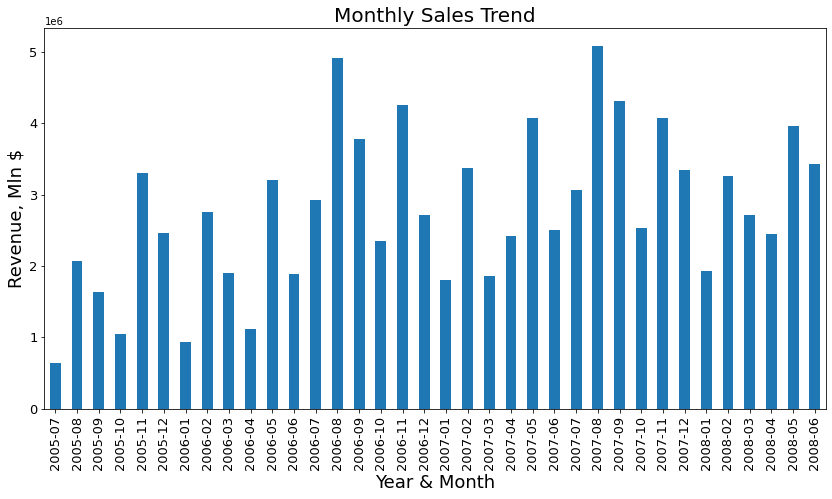

In [33]:
df_trend['UnitSales'].plot(kind='bar', fontsize=13, figsize=(14, 7), color='tab:blue');
plt.title('Monthly Sales Trend', fontsize=20);
plt.ylabel('Revenue, Mln $', fontsize=18);
plt.xlabel('Year & Month', fontsize=18);

In [34]:
# calculating avg revenue for Apr, May, Jun of 2008 and 2007
avg_revenue_last_3months = df_trend['UnitSales'][-3:].mean()
avg_revenue_prev_year = df_trend['UnitSales'][21:24].mean()

In [35]:
sales_increase = (avg_revenue_last_3months - avg_revenue_prev_year) / avg_revenue_prev_year
print(sales_increase.round(3))

0.093


* No signs of decay in terms of monthly revenue over last couple of months. The last three months average revenue has even increased by 9.3 % compared to the same period in year 2007.
* It looks like August was the most financially successful month for the company in 2006 & 2007. We will investigate the reasons behind this later on
* There is a clear seasonality in our data: it looks like the sales reach their maximum in August-September, and then gradually decrease until Spring, where upward trend begins again
* We can also see high volumes of sales in November, apparently due to BlackFriday event
* Interestingly enough, there is no peak in sales during December. Apparently, bikes are not among the most popular X-mas gifts

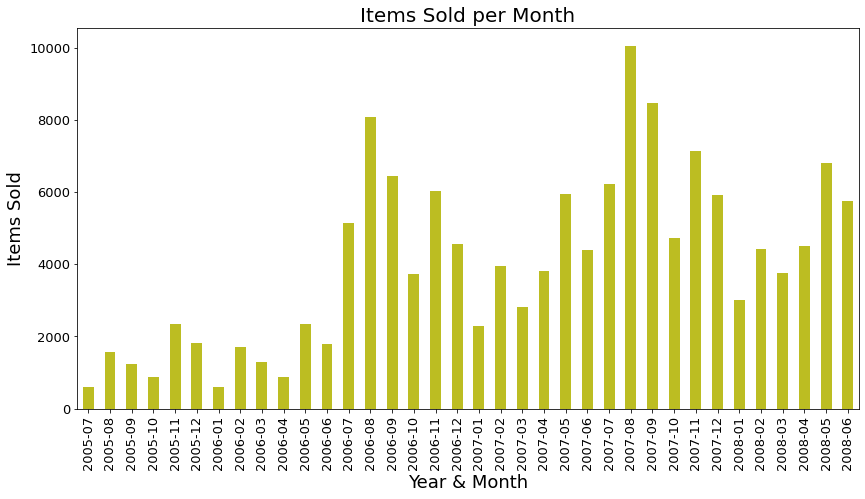

In [36]:
df_trend['OrderQty'].plot(kind='bar', fontsize=13, figsize=(14, 7), color='tab:olive');
plt.title('Items Sold per Month', fontsize=20);
plt.ylabel('Items Sold', fontsize=18);
plt.xlabel('Year & Month', fontsize=18);

* On the plot above, we again observe 'business as usual' in terms of items sold over the last few months. The company has sold even more items in April, May and June of 2008 compared to the same months a year ago
* Seasonality is even more pronounced on this plot
* It looks like almost nobody cares about bikes in January
* We can also see that the company sold significantly less items until June 2006 than during a period after. However, there is no such remarkable difference between theese periods in terms of monthly revenue. Perhaps, the company's price policy had been changed in the middle of 2006

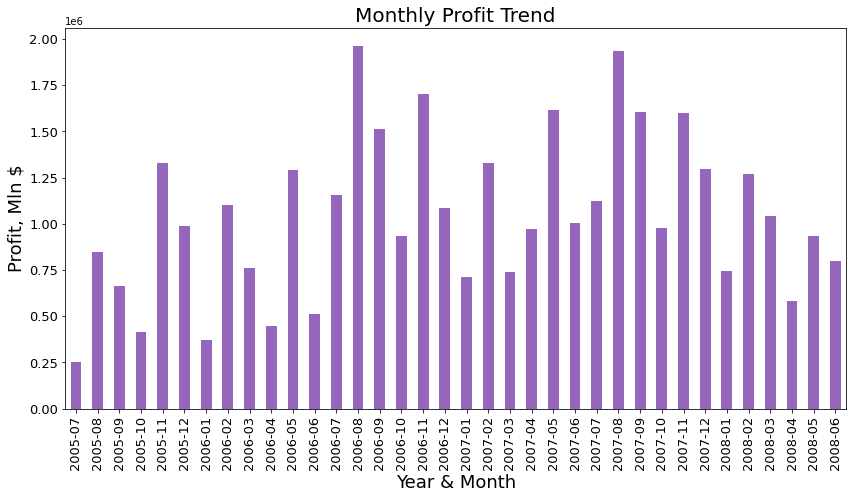

In [37]:
df_trend['OrderProfit'].plot(kind='bar', fontsize=13, figsize=(14, 7), color='tab:purple');
plt.title('Monthly Profit Trend', fontsize=20);
plt.ylabel('Profit, Mln $', fontsize=18);
plt.xlabel('Year & Month', fontsize=18);

In [38]:
# calculating avg profit for Apr, May, Jun of 2008 and 2007
avg_profit_last_3months = df_trend['OrderProfit'][-3:].mean()
avg_profit_prev_year = df_trend['OrderProfit'][21:24].mean()

In [39]:
profit_change = (avg_profit_last_3months - avg_profit_prev_year) / avg_profit_prev_year
print(profit_change.round(3))

-0.355


* Now we can clearly see why the company's shareholders are concerned. Indeed, company's profit in March, April & June of 2008 is considerably lower compared to the same period of the previous year! Average profit for Apr, May & Jun 2008 is 35.5% lower compared to the same period a year ago!
* Again, we can see that August is the most profitable month for the company throughout the whole dataset
* Interestingly enough, February looks like a rather profitable month too

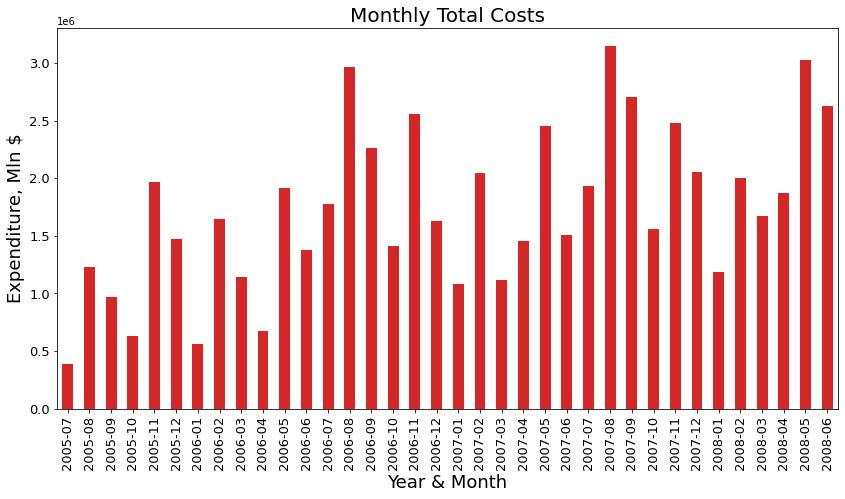

In [40]:
df_trend['OrderTotalCost'].plot(kind='bar', fontsize=13, figsize=(14, 7), color='tab:red');
plt.title('Monthly Total Costs', fontsize=20);
plt.ylabel('Expenditure, Mln $', fontsize=18);
plt.xlabel('Year & Month', fontsize=18);

By looking at Monthly Total Costs plot, we can now understand, why the company's profit has been decreasing recently. The monthly variable costs over the last three months are much higher than in previous years for the same period. 

Let's now check what cost category increased the most.

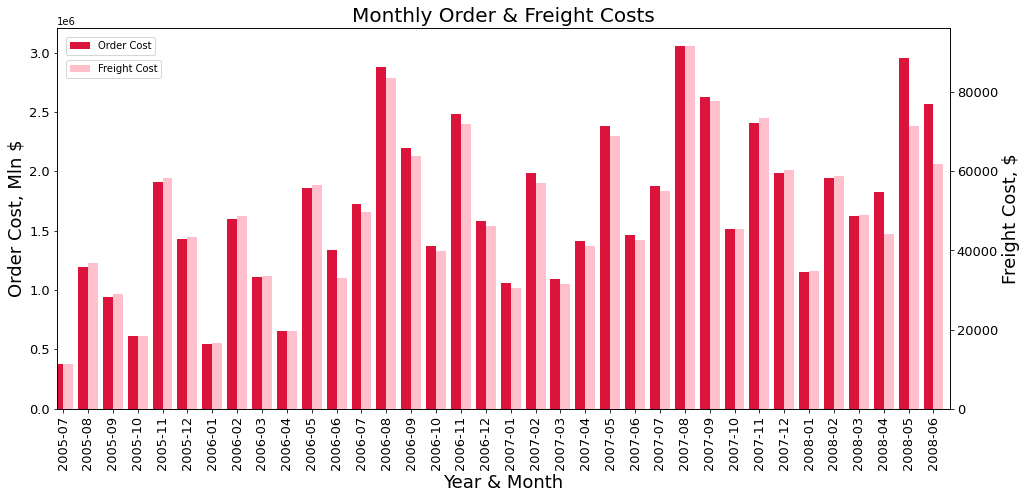

In [41]:
fig = plt.figure(figsize=(16, 7))
plt.title('Monthly Order & Freight Costs', fontsize=20)
ax = fig.add_subplot(111) 
ax2 = ax.twinx()

width = 0.4

df_trend.OrderCost.plot(kind='bar', color='crimson', fontsize=13, ax=ax, width=width, position=1)
df_trend.UnitFreightCost.plot(kind='bar', color='pink', fontsize=13, ax=ax2, width=width, position=0, legend=True)

ax.set_ylabel('Order Cost, Mln $', fontsize=18)
ax2.set_ylabel('Freight Cost, $', fontsize=18)
ax.set_xlabel('Year & Month', fontsize=18)
ax.legend(['Order Cost'], loc=(0.01, 0.93))
ax2.legend(['Freight Cost'], loc=(0.01, 0.87))

plt.show()

We can observe, that order costs are mostly responsible for the recent overall expenditure increase. This cost category also accounts for the largest share of the company's total variable cost. The increase in unit costs is the reason behind the total profit decline over the last few months.

Such a drastic increase in item costs has most likely occurred due to the spike in oil prices which reached the value of 164 USD per barrel in May 2008. [Source](https://www.macrotrends.net/1369/crude-oil-price-history-chart)

High oil prices make manufacturing and shipment from China more expensive, where most of the products sold by the company originate from.

Now, as we found the reason for the profit decline over the last few months, let's continue our analysis and extract more knowledge from the available data.

##### What are the most selling / profitable product categories?

In [42]:
df_cat = df.groupby('ProductCategory').sum().round(1)
df_cat.head()

,UnitCost,UnitPrice,UnitPriceDiscount,OrderQty,UnitFreightCost,OrderCost,OrderTotalCost,OrderProfit,UnitSales,OrderWeekday,OrderMonth,OrderQuarter,OrderYear
ProductCategory,,,,,,,,,,,,,
Accessories,46078.7,118077.5,22.8,15792,115932.7,234065.1,349997.8,239286.8,589284.6,10394,23060,8709,6536093
Bikes,16579714.3,27148261.2,169.8,53544,819110.8,51383930.8,52203041.7,31211887.9,83414929.6,54156,116809,44189,35153236
Clothing,207349.5,383250.5,28.0,41751,293182.4,1051155.0,1344337.4,607411.0,1951748.4,25949,56468,21342,16236739
Components,3279124.7,5736465.4,0.9,33938,527449.0,8083459.8,8610908.8,5563758.2,14174667.0,42983,95952,35678,26124699


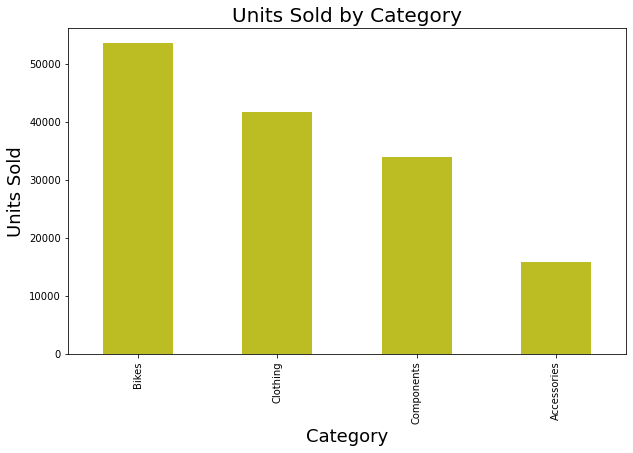

In [43]:
df_cat['OrderQty'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='tab:olive');
plt.title('Units Sold by Category', fontsize=20);
plt.ylabel('Units Sold', fontsize=18);
plt.xlabel('Category', fontsize=18);

Bikes is the most selling category with Clothing, Components & Accessories being 2nd, 3rd & 4th respectively.

What about the most profitable category?

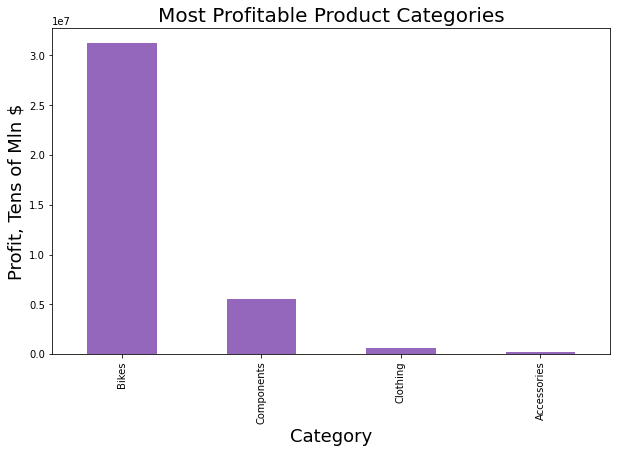

In [44]:
df_cat['OrderProfit'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='tab:purple');
plt.title('Most Profitable Product Categories', fontsize=20);
plt.ylabel('Profit, Tens of Mln $', fontsize=18);
plt.xlabel('Category', fontsize=18);

* Bikes is the most profitable product category by a large margin. During the observed period, this category earned Adventure Works Cycles more than 30 mln USD!
* On the other hand, categories Accessories & Clothing have barely exceeded their operating break-even points.

##### What are the top 10 selling / profitable product sub-categories?

In [45]:
df_subcat = df.groupby('ProductSubCategory').sum().round(1)
df_subcat.sort_values('OrderQty', ascending=False).head(10)

,UnitCost,UnitPrice,UnitPriceDiscount,OrderQty,UnitFreightCost,OrderCost,OrderTotalCost,OrderProfit,UnitSales,OrderWeekday,OrderMonth,OrderQuarter,OrderYear
ProductSubCategory,,,,,,,,,,,,,
Road Bikes,8258336.6,12948246.0,17.7,29310,412999.6,24423530.1,24836529.6,13251110.1,38087639.7,28209,63526,24191,19374723
Mountain Bikes,6000417.9,10680588.4,86.3,17377,292238.9,20114766.5,20407005.4,14860900.2,35267905.6,16518,36883,13965,10950500
Jerseys,100605.9,126511.3,5.4,11821,92164.4,484664.3,576828.7,26564.1,603392.9,7766,17550,6619,4964649
Road Frames,1201513.4,1975614.8,0.1,8427,134640.7,2932550.9,3067191.6,1761800.6,4828992.2,10441,25567,9492,6785674
Mountain Frames,1415560.8,2533780.2,0.1,8403,146397.0,3346580.5,3492977.4,2491766.0,5984743.4,10449,23594,8808,6636603
Helmets,24494.3,64206.6,18.8,8291,72536.8,111439.7,183976.5,101582.9,285559.3,5536,12931,4883,3681910
Gloves,17284.7,43068.5,6.3,7639,47658.2,99548.5,147206.7,94171.5,241378.2,4525,9888,3738,2803372
Touring Bikes,2320959.8,3519426.8,65.9,6857,113872.4,6845634.3,6959506.6,3099877.7,10059384.3,9429,16400,6033,4828013
Shorts,27981.7,69549.5,6.4,6040,33002.9,163041.4,196044.4,201428.9,397473.3,3551,7109,2692,2107456


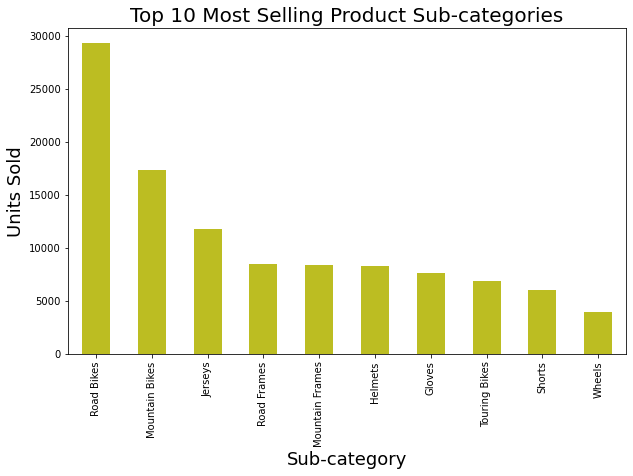

In [46]:
df_subcat['OrderQty'].sort_values(ascending=False)[:10].plot(kind='bar', figsize=(10, 6), color='tab:olive');
plt.title('Top 10 Most Selling Product Sub-categories', fontsize=20);
plt.ylabel('Units Sold', fontsize=18);
plt.xlabel('Sub-category', fontsize=18);

Road Bikes is by far the most selling product sub-category.

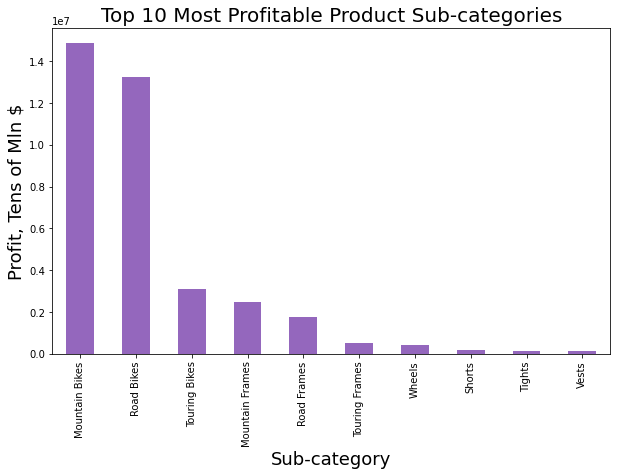

In [47]:
df_subcat['OrderProfit'].sort_values(ascending=False)[:10].plot(kind='bar', figsize=(10, 6), color='tab:purple');
plt.title('Top 10 Most Profitable Product Sub-categories', fontsize=20);
plt.ylabel('Profit, Tens of Mln $', fontsize=18);
plt.xlabel('Sub-category', fontsize=18);

As for the overall profit, Mountain Bikes & Road Bikes are the 1st and the 2nd sub-category respectively.

##### What are 10 least profitable sub-categories?

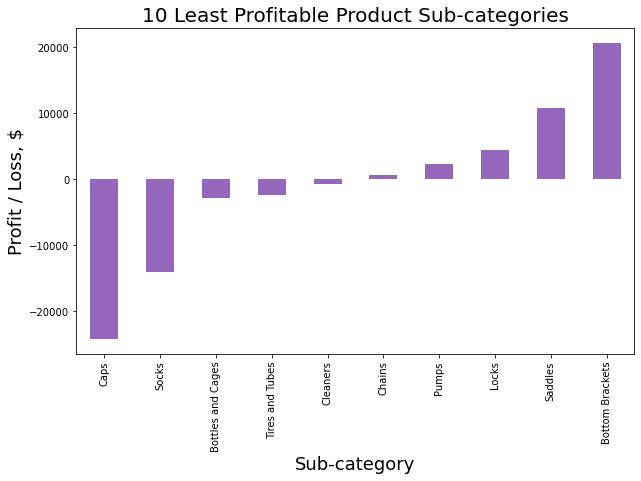

In [48]:
df_subcat['OrderProfit'].sort_values(ascending=True)[:10].plot(kind='bar', figsize=(10, 6), color='tab:purple');
plt.title('10 Least Profitable Product Sub-categories', fontsize=20);
plt.ylabel('Profit / Loss, $', fontsize=18);
plt.xlabel('Sub-category', fontsize=18);

Sub-categories Caps, Socks, Bottles and Cages, & Cleaners are unprofitable for the company.

Let's now check for unprofitable sub-categories over the last three months.

In [49]:
df_subcat_recent = df[df.OrderYearMonth >= '2008-04'].groupby('ProductSubCategory')['OrderProfit'].sum().round(1)

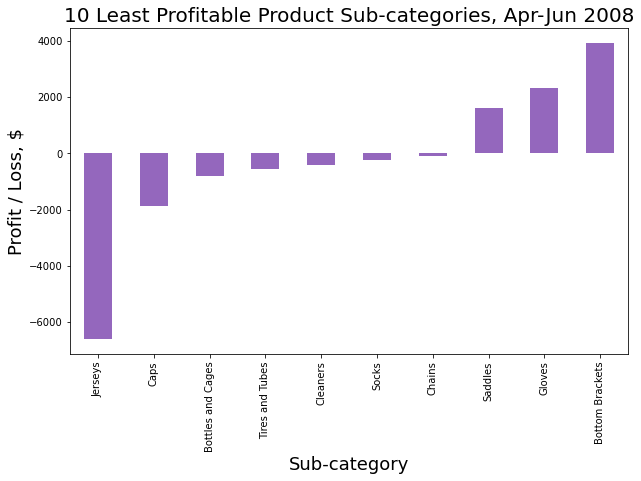

In [50]:
df_subcat_recent.sort_values(ascending=True)[:10].plot(kind='bar', figsize=(10, 6), color='tab:purple');
plt.title('10 Least Profitable Product Sub-categories, Apr-Jun 2008', fontsize=20);
plt.ylabel('Profit / Loss, $', fontsize=18);
plt.xlabel('Sub-category', fontsize=18);

Over the last three months, Adventure Works Cycles lost over 6.000 USD by selling jerseys. Tires & Tubes is another sub-category that became unprofitable due to overall cost increase recently.

##### What are the top 10 selling / profitable products?

In [51]:
df_product = df.groupby('ProductName').sum().round(1)
df_product.sort_values('OrderQty', ascending=False).head(10)

,UnitCost,UnitPrice,UnitPriceDiscount,OrderQty,UnitFreightCost,OrderCost,OrderTotalCost,OrderProfit,UnitSales,OrderWeekday,OrderMonth,OrderQuarter,OrderYear
ProductName,,,,,,,,,,,,,
"Long-Sleeve Logo Jersey, L",31313.5,39842.0,1.9,3865,30676.4,152275.5,182951.9,8713.3,191665.2,2389,5575,2102,1599174
AWC Logo Cap,5697.1,7236.9,1.9,3813,31173.5,27040.2,58213.7,-24214.4,33999.3,2430,5610,2120,1615237
"Sport-100 Helmet, Blue",8754.7,22953.4,6.4,2974,26076.7,40004.8,66081.5,36323.0,102404.5,1965,4500,1702,1316270
"Sport-100 Helmet, Black",8195.3,21483.9,6.4,2735,23930.8,36726.7,60657.5,33630.8,94288.3,1842,4313,1633,1231997
"Sport-100 Helmet, Red",7544.3,19769.4,6.0,2582,22529.4,34708.1,57237.5,31629.0,88866.6,1729,4118,1548,1133643
"Full-Finger Gloves, L",3917.7,9497.5,4.1,2461,8929.4,38566.1,47495.5,42269.2,89764.7,760,1662,634,501619
"Classic Vest, S",7575.9,19050.0,2.9,2298,8455.2,57834.8,66290.0,76179.2,142469.2,1051,2018,763,602245
"Long-Sleeve Logo Jersey, M",20497.1,26044.8,0.5,2063,21344.4,81315.0,102659.4,172.5,102831.9,1583,3775,1420,1045384
"Women's Mountain Shorts, S",6158.0,15537.8,3.2,2017,6446.1,55997.6,62443.8,74061.9,136505.7,777,1469,555,445664


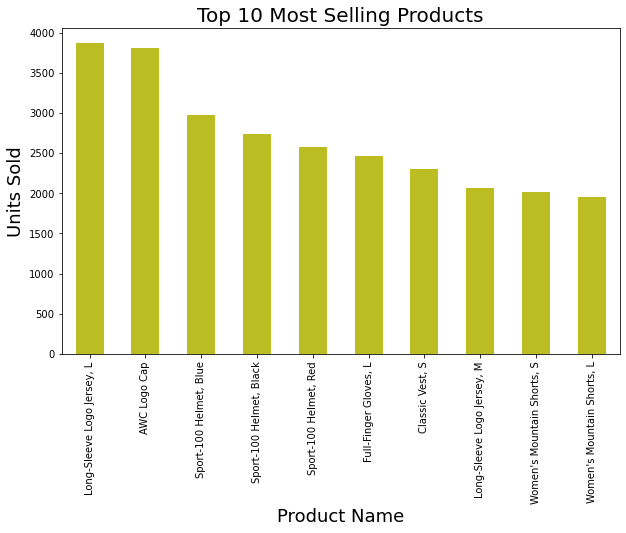

In [52]:
df_product['OrderQty'].sort_values(ascending=False)[:10].plot(kind='bar', figsize=(10, 6), color='tab:olive');
plt.title('Top 10 Most Selling Products', fontsize=20);
plt.ylabel('Units Sold', fontsize=18);
plt.xlabel('Product Name', fontsize=18);

Interestingly enough, bikes are not among the top ten selling products, but rather items from categories Clothing & Accessories.

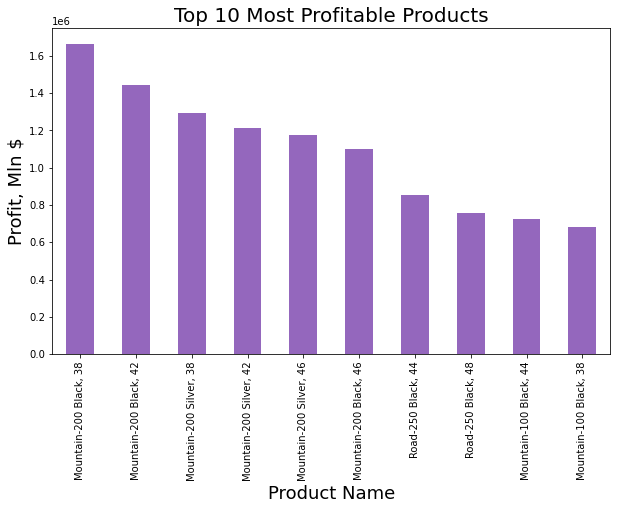

In [53]:
df_product['OrderProfit'].sort_values(ascending=False)[:10].plot(kind='bar', figsize=(10, 6), color='tab:purple');
plt.title('Top 10 Most Profitable Products', fontsize=20);
plt.ylabel('Profit, Mln $', fontsize=18);
plt.xlabel('Product Name', fontsize=18);

We can see predominantly mountain bikes among the top 10 most profitable products, meaning that bikes have much larger profit margins as oppose to items from other product categories.

##### During what season / month are the most products sold?

In [54]:
df_season = df.groupby('OrderSeason').sum().round(1)
df_season

,UnitCost,UnitPrice,UnitPriceDiscount,OrderQty,UnitFreightCost,OrderCost,OrderTotalCost,OrderProfit,UnitSales,OrderWeekday,OrderMonth,OrderQuarter,OrderYear
OrderSeason,,,,,,,,,,,,,
Fall,5108046.4,8705782.1,43.9,40992,478073.4,16068270.3,16546343.7,10736047.5,27282391.1,37079,114496,41386,22908130
Spring,5066711.9,8097056.0,37.0,32169,416012.4,14920175.8,15336188.2,8385001.9,23721190.1,26887,40903,16847,19612986
Summer,5257496.5,8644549.0,135.8,43578,465426.6,16473470.2,16938896.9,9594720.5,26533617.3,40253,84172,31752,23664526
Winter,4680012.5,7938667.6,4.9,28286,396162.4,13290694.5,13686856.9,8906574.1,22593431.0,29263,52718,19933,17865125


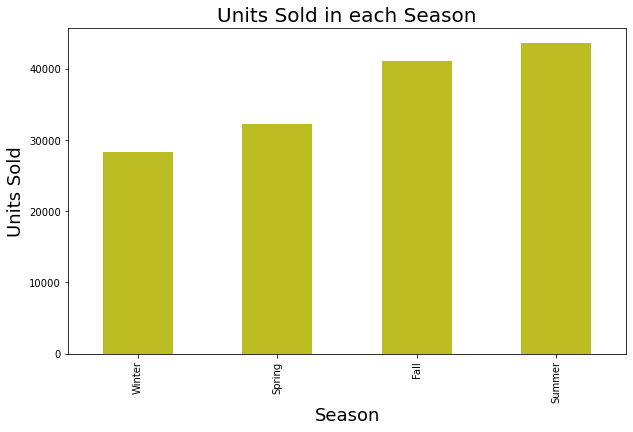

In [55]:
df_season['OrderQty'].sort_values().plot(kind='bar', figsize=(10, 6), color='tab:olive');
plt.title('Units Sold in each Season', fontsize=20);
plt.ylabel('Units Sold', fontsize=18);
plt.xlabel('Season', fontsize=18);

Summer is the most active season in terms of total units sold, following by fall. As already observed, the company sells the least number of items during winter.

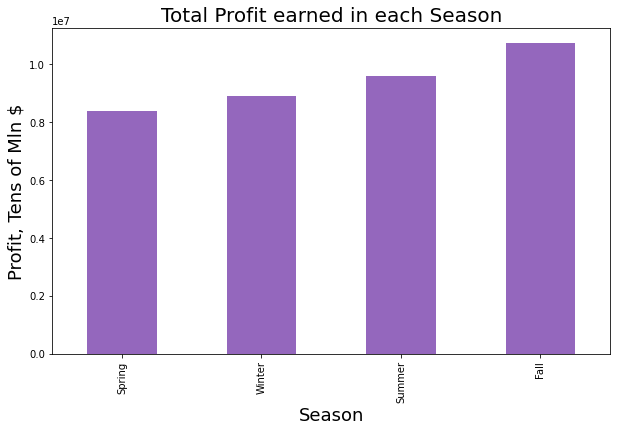

In [56]:
df_season['OrderProfit'].sort_values().plot(kind='bar', figsize=(10, 6), color='tab:purple');
plt.title('Total Profit earned in each Season', fontsize=20);
plt.ylabel('Profit, Tens of Mln $', fontsize=18);
plt.xlabel('Season', fontsize=18);

Summer is not the most profitable season though, being 2nd after fall. Spring is the least profitable season.

In [57]:
df_month = df.groupby('OrderMonth').sum().round(1)
df_month

,UnitCost,UnitPrice,UnitPriceDiscount,OrderQty,UnitFreightCost,OrderCost,OrderTotalCost,OrderProfit,UnitSales,OrderWeekday,OrderQuarter,OrderYear
OrderMonth,,,,,,,,,,,,
1,958706.7,1620448.5,0.9,5910,81714.0,2757065.5,2838779.5,1828943.7,4667723.2,2566,1856,3725598
2,1977919.2,3350238.1,1.1,10084,164648.9,5532642.1,5697291.0,3704343.3,9401634.3,10846,3369,6762322
3,1462389.3,2478544.1,0.9,7868,114172.2,3824791.8,3938964.0,2542375.3,6481339.2,10133,2695,5409629
4,1227137.0,1905803.7,3.4,9203,104953.7,3896557.4,4001511.2,1998600.3,6000111.5,9267,5124,5142711
5,2377185.6,3712708.3,32.6,15098,196886.6,7198826.5,7395713.1,3844026.3,11239739.4,7487,9028,9060646
6,1898626.0,2913737.7,58.6,11927,137442.5,5368423.1,5505865.6,2314640.0,7820505.6,17383,7254,7280498
7,1140331.2,1940975.7,40.6,11970,116102.4,3976607.3,4092709.7,2537152.0,6629861.7,15722,8754,5854640
8,2218539.3,3789835.6,36.6,19681,211881.7,7128439.8,7340321.5,4742928.5,12083250.0,7148,15744,10529388
9,1778038.5,3036234.4,37.5,16144,170579.2,5769355.6,5939934.8,3779962.8,9719897.6,18894,12858,8599466


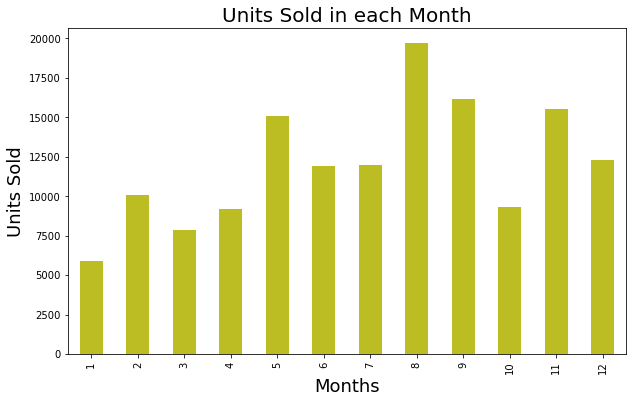

In [58]:
df_month['OrderQty'].plot(kind='bar', figsize=(10, 6), color='tab:olive');
plt.title('Units Sold in each Month', fontsize=20);
plt.ylabel('Units Sold', fontsize=18);
plt.xlabel('Months', fontsize=18);

The highest number of items is sold in August, following by September, November & May. In January, the company sells the lowest number of products.

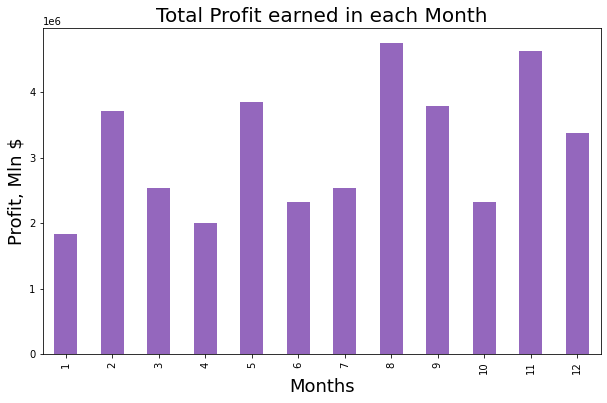

In [59]:
df_month['OrderProfit'].plot(kind='bar', figsize=(10, 6), color='tab:purple');
plt.title('Total Profit earned in each Month', fontsize=20);
plt.ylabel('Profit, Mln $', fontsize=18);
plt.xlabel('Months', fontsize=18);

August is the most profitable month for the company with November being the second one by a slim margin. January and April are the least financially successful months for the company.

Let's now check how different product categories are sold each month.

In [60]:
df_cat_month = pd.DataFrame(df.groupby(['OrderMonth', 'ProductCategory'])['OrderQty'].sum()).reset_index()
df_cat_month.head(10)

,OrderMonth,ProductCategory,OrderQty
0,1,Accessories,587
1,1,Bikes,2861
2,1,Clothing,1775
3,1,Components,687
4,2,Accessories,699
5,2,Bikes,5238
6,2,Clothing,2470
7,2,Components,1677
8,3,Accessories,703
9,3,Bikes,3688


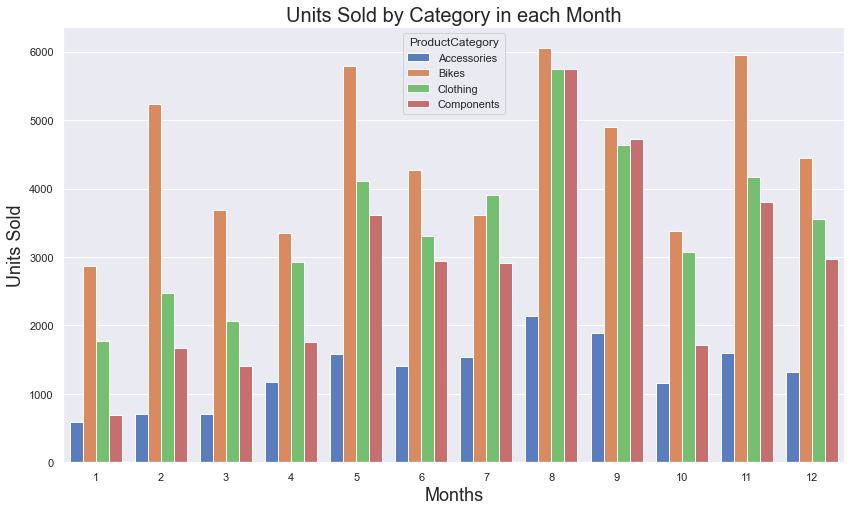

In [61]:
sns.set(rc={'figure.figsize':(14, 8)})
ax = sns.barplot(x='OrderMonth', y='OrderQty', hue='ProductCategory', data=df_cat_month, ci=None, palette='muted')
plt.title('Units Sold by Category in each Month', fontsize=20);
plt.ylabel('Units Sold', fontsize=18);
plt.xlabel('Months', fontsize=18);

As we can see, products from categories Clothing & Components are especially popular during August & September. There are probably certain marketing measures that are responsible for this. The highest number of bikes the company sells during February, May, August & November.

##### What was the most successful year for the company?

Next, we check what year was the most profitable for the company.

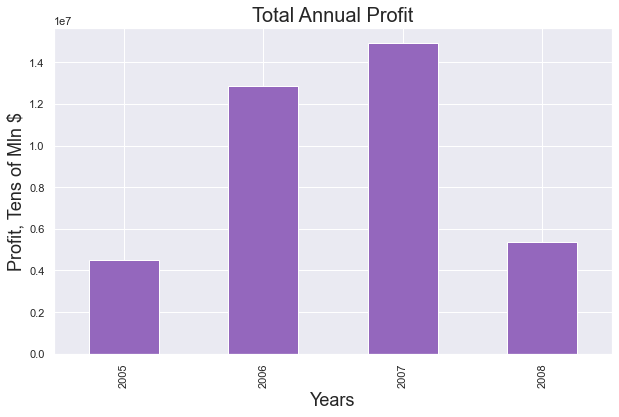

In [62]:
df.groupby('OrderYear')['OrderProfit'].sum().plot(kind='bar', figsize=(10, 6), color='tab:purple');
plt.title('Total Annual Profit', fontsize=20);
plt.ylabel('Profit, Tens of Mln $', fontsize=18);
plt.xlabel('Years', fontsize=18);

It seems like in 2007 the company paid the highest tax bill. Note though, that the data for 2005 & 2008 are incomplete.

##### During what season does the company sell discounted products?

In [63]:
df_discounts = pd.DataFrame(df.groupby(['OrderSeason', 'ProductCategory'])['UnitPriceDiscount'].mean()).reset_index().round(4)
df_discounts

,OrderSeason,ProductCategory,UnitPriceDiscount
0,Fall,Accessories,0.0026
1,Fall,Bikes,0.0073
2,Fall,Clothing,0.0039
3,Fall,Components,0.0001
4,Spring,Accessories,0.0019
5,Spring,Bikes,0.0070
6,Spring,Clothing,0.0027
7,Spring,Components,0.0000
8,Summer,Accessories,0.0186
9,Summer,Bikes,0.0245


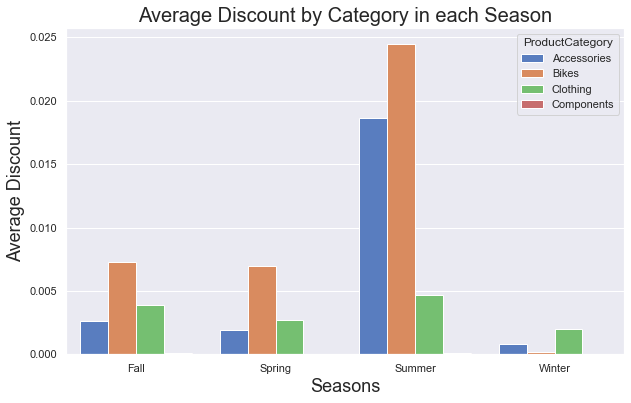

In [64]:
sns.set(rc={'figure.figsize':(10, 6)})
ax = sns.barplot(x='OrderSeason', y='UnitPriceDiscount', hue='ProductCategory', 
                 data=df_discounts, ci=None, palette='muted')
plt.title('Average Discount by Category in each Season', fontsize=20);
plt.ylabel('Average Discount', fontsize=18);
plt.xlabel('Seasons', fontsize=18);

* During summer, the company often offers its products at discounted prices
* That is probably why we observe sales peak in August
* There are no sales discounts on units from the category Components
* Almost no sales promotions during winter season

In [65]:
df_discounts = pd.DataFrame(df.groupby(['OrderMonth', 'ProductCategory'])['UnitPriceDiscount'].mean()).reset_index().round(4)
df_discounts.head()

,OrderMonth,ProductCategory,UnitPriceDiscount
0,1,Accessories,0.0000
1,1,Bikes,0.0002
2,1,Clothing,0.0019
3,1,Components,0.0000
4,2,Accessories,0.0003


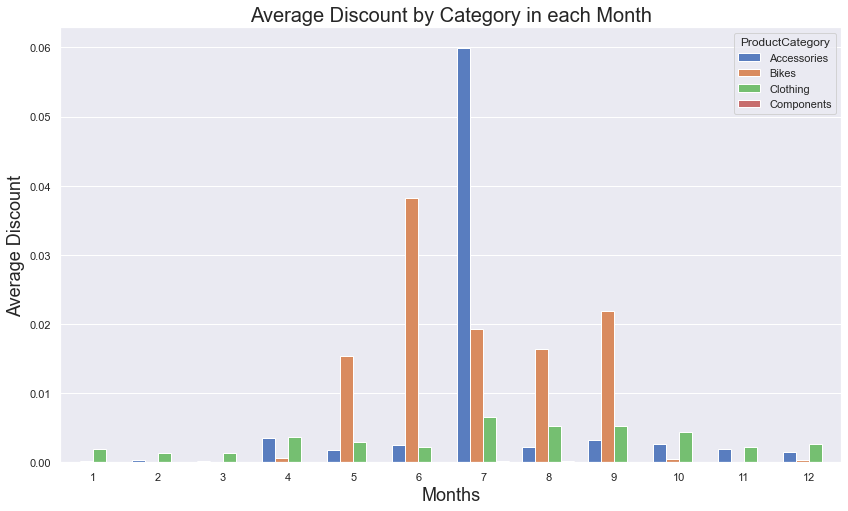

In [66]:
sns.set(rc={'figure.figsize':(14, 8)})
ax = sns.barplot(x='OrderMonth', y='UnitPriceDiscount', hue='ProductCategory', 
                 data=df_discounts, ci=None, palette='muted')
plt.title('Average Discount by Category in each Month', fontsize=20);
plt.ylabel('Average Discount', fontsize=18);
plt.xlabel('Months', fontsize=18);

There are particularly frequent sales discounts on Accessories in July, and on Bikes in June. Overall, the company is active with its sales promotions from May till September.

##### What is the most profitable customer region?

In [67]:
df_region = df.groupby('SalesRegion').sum().round(1)
df_region['OrderProfit']

SalesRegion
France            2502049.4
Germany               143.8
United States    35120150.7
Name: OrderProfit, dtype: float64

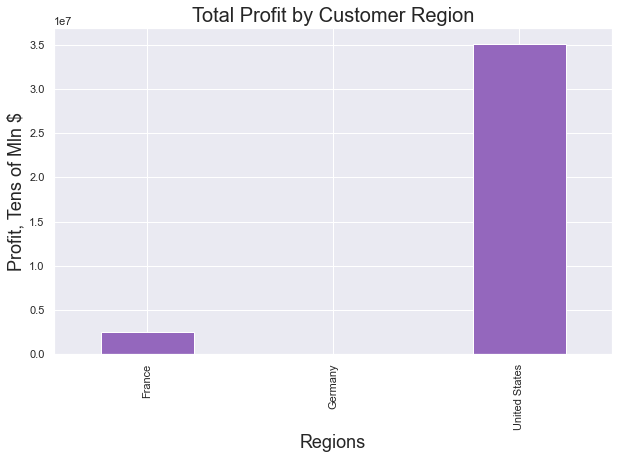

In [71]:
df_region['OrderProfit'].plot(kind='bar', figsize=(10, 6), color='tab:purple');
plt.title('Total Profit by Customer Region', fontsize=20);
plt.ylabel('Profit, Tens of Mln $', fontsize=18);
plt.xlabel('Regions', fontsize=18);

The vast majority of its profit the company yield in the USA. The company earned slightly over 35 Mln USD in this country during the observed period.

##### What are the top 10 most profitable customer provinces?

In [120]:
df_province = df.groupby('CustomerProvince').sum().round(1)
df_province.sort_values('OrderProfit', ascending=False).head(10)

,UnitCost,UnitPrice,UnitPriceDiscount,OrderQty,UnitFreightCost,OrderCost,OrderTotalCost,OrderProfit,UnitSales,OrderWeekday,OrderMonth,OrderQuarter,OrderYear
CustomerProvince,,,,,,,,,,,,,
California,3399268.3,5595190.8,40.0,24302,299362.7,10508788.4,10808151.1,6285796.8,17093947.9,21473,49449,18201,13886308
Washington,2315631.8,3873919.2,26.4,16388,211077.0,7218733.4,7429810.5,4542731.7,11972542.1,13964,31698,11976,9179054
Texas,2250543.3,3742786.5,16.2,16392,201045.3,6961877.1,7162922.4,4361783.4,11524705.8,15371,33905,12534,9601891
Colorado,738899.1,1224375.2,9.1,6703,72273.8,2487190.8,2559464.6,1586650.0,4146114.6,4753,11620,4411,3357327
Florida,863526.1,1439664.0,9.7,6117,69705.2,2371060.5,2440765.8,1514790.5,3955556.3,6133,11924,4837,3714505
Tennessee,772408.7,1278391.0,9.4,3605,64139.4,2267557.5,2331696.9,1331572.7,3663269.6,3682,8712,3141,2431787
Utah,452727.0,794429.7,8.9,3393,53876.9,1776026.2,1829903.1,1235521.4,3065424.5,2909,6680,2425,1834228
Missouri,624807.8,1045023.0,7.1,4006,54556.2,1885836.9,1940393.1,1172302.1,3112695.1,4796,9042,3394,2576795
New Hampshire,601425.7,975039.9,3.5,4550,54712.7,1950176.4,2004889.1,1147138.0,3152027.1,4234,8386,3317,2536391


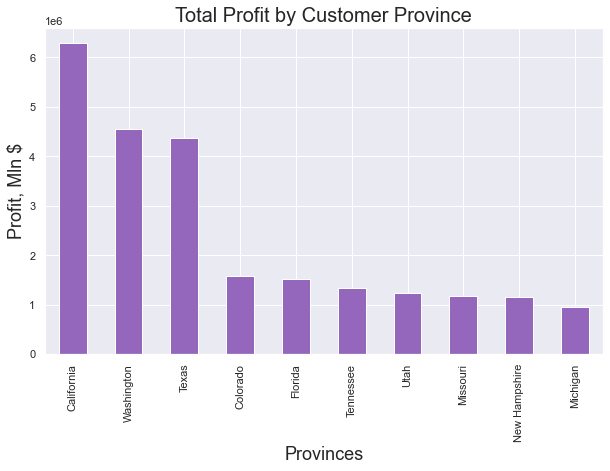

In [121]:
df_province['OrderProfit'].sort_values(ascending=False)[:10].plot(kind='bar', figsize=(10, 6), color='tab:purple');
plt.title('Top 10 most profitable customer provinces', fontsize=20);
plt.ylabel('Profit, Mln $', fontsize=18);
plt.xlabel('Provinces', fontsize=18);

California is by far the most profitable province, following by Washington & Texas.

##### What are 10 least profitable customer provinces?

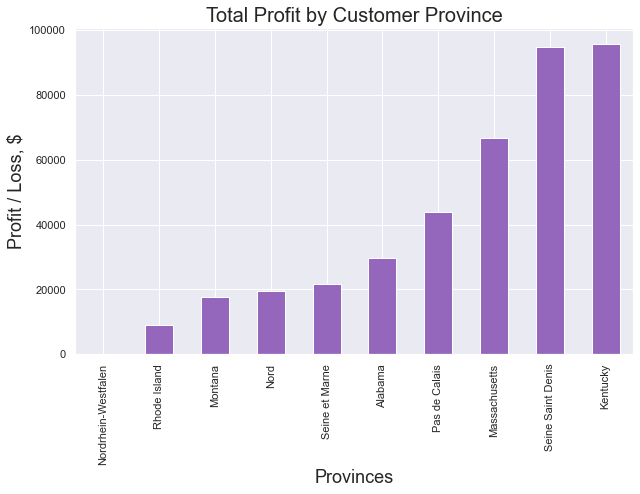

In [122]:
df_province['OrderProfit'].sort_values(ascending=True)[:10].plot(kind='bar', figsize=(10, 6), color='tab:purple');
plt.title('10 least profitable customer provinces', fontsize=20);
plt.ylabel('Profit / Loss, $', fontsize=18);
plt.xlabel('Provinces', fontsize=18);

There are no unprofitable customer provinces. There were not enough items sold in Germany to make conclusions.

##### What are the top 5 most efficient sales managers?

In [123]:
df_managers = df.groupby('SalesPerson').sum().round(1)
df_managers.sort_values('OrderProfit', ascending=False).head()

,UnitCost,UnitPrice,UnitPriceDiscount,OrderQty,UnitFreightCost,OrderCost,OrderTotalCost,OrderProfit,UnitSales,OrderWeekday,OrderMonth,OrderQuarter,OrderYear
SalesPerson,,,,,,,,,,,,,
Linda Mitchell,3306161.8,5549140.8,43.4,27229,316192.9,10825336.5,11141529.4,6911790.8,18053320.2,20631,50227,18709,14262017
Jillian Carson,3586425.7,5947155.3,28.2,27051,303947.8,10519157.3,10823105.1,6593398.3,17416503.4,25063,54472,20393,15702271
Michael Blythe,3380341.2,5598672.8,32.1,23058,281300.6,9778825.2,10060125.8,6049069.6,16109195.4,24106,50172,18732,14185315
Tsvi Reiter,2810874.4,4697090.4,28.0,16431,217871.4,7469639.6,7687511.0,4741895.0,12429406.1,16436,36930,14181,10869994
Shu Ito,2264264.2,3727759.5,29.4,15397,198228.9,6972600.9,7170829.8,4124583.4,11295413.3,15502,32033,12047,9120470


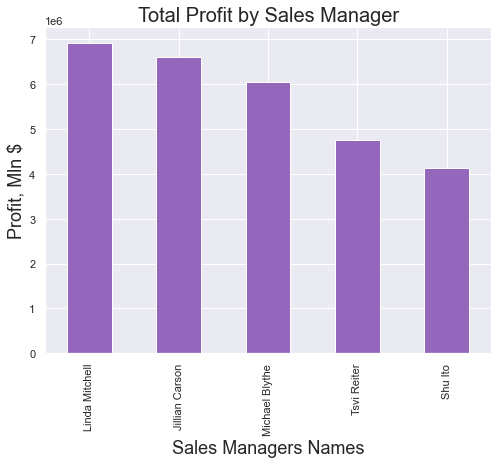

In [125]:
df_managers['OrderProfit'].sort_values(ascending=False)[:5].plot(kind='bar', figsize=(8, 6), color='tab:purple');
plt.title('Total Profit by Sales Manager', fontsize=20);
plt.ylabel('Profit, Mln $', fontsize=18);
plt.xlabel('Sales Managers Names', fontsize=18);

Linda Mitchell, Jillian Carson, & Michael Blythe are the most productive sales managers in the company. Combined they earned almost 20 Mln USD for the company over three years.